<h3 align='center'>Codebasics ML Course: Hierarchical Clustering</h3>

Problem Statement: Use Hierarchical clustering for customer segmentation. We will cluster people based on their income and age.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("income.xlsx", names=["name","age","income"])
df

,name,age,income
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87
5,David,48,68
6,Ismail,31,80
7,Sheela,55,60


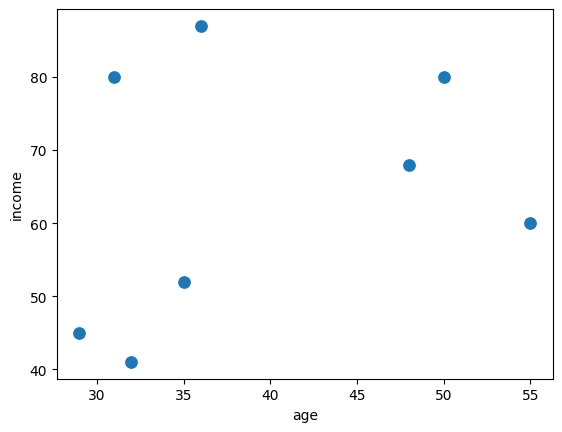

In [2]:
sns.scatterplot(df, x='age', y='income', s=100)
plt.show()

### Form clusters using sklearn AgglomerativeClustering

In [4]:
from sklearn.cluster import AgglomerativeClustering

X = df[['age', 'income']]
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
hc.fit(X)

AgglomerativeClustering(linkage='average')

In [5]:
hc.labels_

array([1, 0, 1, 1, 0, 0, 0, 0])

In [6]:
df["cluster"] = hc.labels_
df

,name,age,income,cluster
0,Rob,29,45,1
1,Andrea,50,80,0
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,0
5,David,48,68,0
6,Ismail,31,80,0
7,Sheela,55,60,0


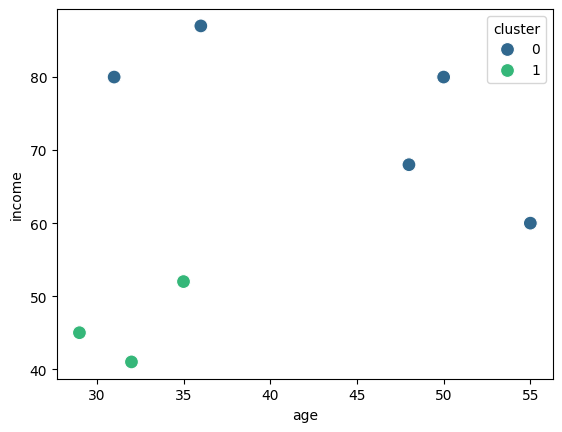

In [7]:
sns.scatterplot(df, x='age', y='income',  palette='viridis', s=100, hue="cluster")
plt.show()

### Form clusters using scipy

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = df[['age', 'income']]
Z = linkage(X, method='average')
Z

array([[ 0.        ,  3.        ,  5.        ,  2.        ],
       [ 4.        ,  6.        ,  8.60232527,  2.        ],
       [ 2.        ,  8.        , 10.31064935,  3.        ],
       [ 5.        ,  7.        , 10.63014581,  2.        ],
       [ 1.        , 11.        , 16.39052659,  3.        ],
       [ 9.        , 12.        , 23.69824661,  5.        ],
       [10.        , 13.        , 33.65863823,  8.        ]])

Each row in the matrix above is for each merge operation. Total there were 7 merge operations. Each column represents,
1. First and Second column: Index of two rows (clusters) being merged
1. Third column: Distance between merged clusters
1. Forth column: Total number of data points in the cluster    

In [81]:
np.sqrt((29-32)**2+(45-41)**2)

5.0

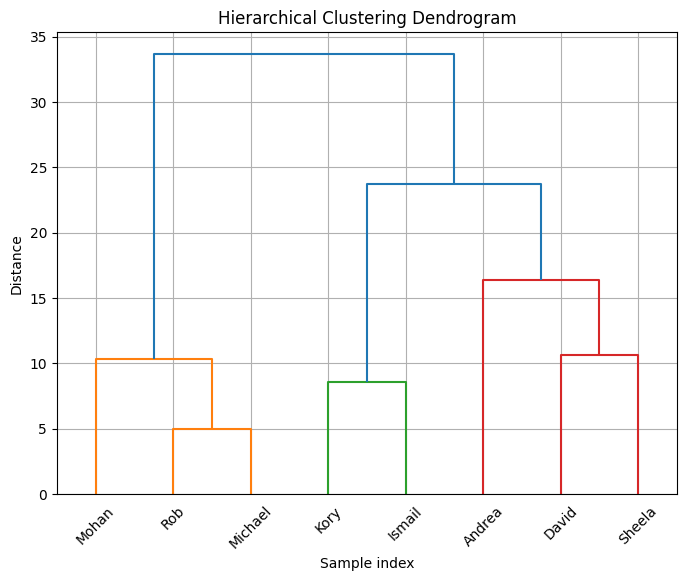

In [10]:
# Plotting the dendrogram
plt.figure(figsize=(8,6))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=df['name'].values, leaf_rotation=45, leaf_font_size=10)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [11]:
clusters = fcluster(Z, t=3, criterion="maxclust")
clusters

array([1, 3, 1, 1, 2, 3, 2, 3], dtype=int32)

In [12]:
df["cluster"] = clusters
df

,name,age,income,cluster
0,Rob,29,45,1
1,Andrea,50,80,3
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,2
5,David,48,68,3
6,Ismail,31,80,2
7,Sheela,55,60,3


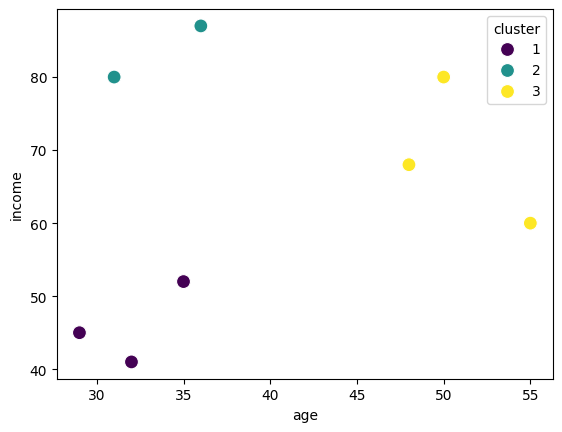

In [13]:
sns.scatterplot(df, x='age', y='income',  palette='viridis', s=100, hue="cluster")
plt.show()